# 분석을 위한 데이터 핸들링 하기

빠른 분석을 위해 몇가지 조건으로 데이터를 처리하겠습니다. 
- 칼럼 이름을 한글로 변경
- 이주일치만 남기기 - 빠른 분석을 위함
- A03에서 구매한 사람의 데이터만 구성
- 한번도 구매 안한사람 제외 
- 아이템을 영어에서 한글로 바꿈
- 간단한 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tq
pd.set_option('display.max_row',300)
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [2]:
cks_dtype = {'clnt_id':'int64',
             'sess_id':'int64',
             'hit_seq':'int64',
             'action_type':'int64',
             'biz_unit':'category',
             'sess_dt':'object',
             'hit_tm':'object',
             'hit_pss_tm':'int64',
             'trans_id':'float64',
             'sech_kwd':'object',
             'tot_pag_view_ct':'float64',
             'tot_sess_hr_v':'float64',
             'trfc_src':'category',
             'dvc_ctg_nm':'category',
             'pd_c':'float64',
             'de_dt':'object',
             'de_tm':'object',
             'buy_am':'int64',
             'buy_ct':'int64',
             'clnt_gender':'category',
             'clnt_age':'float64'}

In [3]:
online = pd.read_csv('./DATA/온라인 행동 정보(CKS).csv', dtype=cks_dtype)
trade = pd.read_csv('./DATA/거래 정보(CKS).csv', dtype=cks_dtype)
customer = pd.read_csv('./DATA/고객 정보(CKS).csv', dtype=cks_dtype)
item = pd.read_csv('./DATA/상품분류 정보(CKS).csv', dtype=cks_dtype)

In [16]:
online.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,1,1,1,0,A01,20190911,16:14,11880,NaN,과일선물세트,14.0,124.0,unknown,mobile_app
1,1,1,2,0,A01,20190911,16:15,22432,NaN,과일선물세트 백화점,14.0,124.0,unknown,mobile_app
2,1,1,3,0,A01,20190911,16:15,36140,NaN,과일바구니,14.0,124.0,unknown,mobile_app
3,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,45.0,424.0,unknown,mobile_app
4,1,2,2,0,A01,20190922,14:10,56113,NaN,초등가을점퍼,45.0,424.0,unknown,mobile_app


In [17]:
online.shape

(3196362, 14)

In [18]:
customer.head()

,clnt_id,clnt_gender,clnt_age
0,1,NaN,NaN
1,2,F,30.0
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN


In [19]:
item.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


### 데이터를 이주일치만 남기기

분석을 하다보면 많은 데이터의 양이 불필요한 시간낭비를 초래합니다.  
그래서 3개월이 아닌 2주만 남기고 데이터를 정리했습니다. 

In [8]:
online_week = online[online['sess_dt'] < 20190715]
online_week = online_week.sort_values(by='sess_dt')
online_week.shape

### A03을 제외한 row 제거

온라인 데이터에서는 총 3군데 (A01, A02, A03)의 biz_unit 정보가 있습니다.  
이 중에서 A03만 남기고 제외하겠습니다.

In [9]:
online_week = online_week[online_week['biz_unit'] == 'A03']

In [10]:
online_week.shape

(375281, 15)

### 영어에서 한글로 바꿈

sech_kwd는 한글로 되어있는 반면, pd_c 정보는 영어로 되어 있습니다.  
추후에 sech_kwd와 pd_c 정보의 상관 관계를 파악하기 위해서 한글로 변경하겠습니다. 

In [9]:
item.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [20]:
csv_path=os.getenv("HOME") + ('/repo/Hackathon/Lpoint Competition/csv/')
papago = pd.read_csv(csv_path+ 'papago.csv', header=None)
item['clac_nm3'] = papago[0]
item.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,자동차 오일/첨가물
1,2.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,카 라이트
2,3.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,카 페인트
3,4.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,필터
4,5.0,Automotive Products,Automotive Replacement Repair / Maintanance Kits,와이퍼 블레이드


In [13]:
item['clac_nm3'][963] = '닭고기 달걀'
item['clac_nm3'] = item['clac_nm3'].fillna('nan')

In [14]:
item['clac_nm3'].isna().sum()

0

### 간단한 전처리

앞선 전처리 이외에도 처리가 안된 데이터를 정리해줍니다.

In [11]:
import matplotlib.font_manager as fm
%matplotlib inline
warnings.filterwarnings(action='ignore')
path = 'DATA/font/NanumGothic-ExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [12]:
customer.loc[customer['clnt_gender']=='unknown','clnt_gender'] = np.NaN
customer['clnt_gender'] = customer['clnt_gender'].astype('category')

customer.loc[customer['clnt_age']=='unknown','clnt_age'] = np.NaN
customer['clnt_age'] = customer['clnt_age'].astype(float)

<AxesSubplot:>

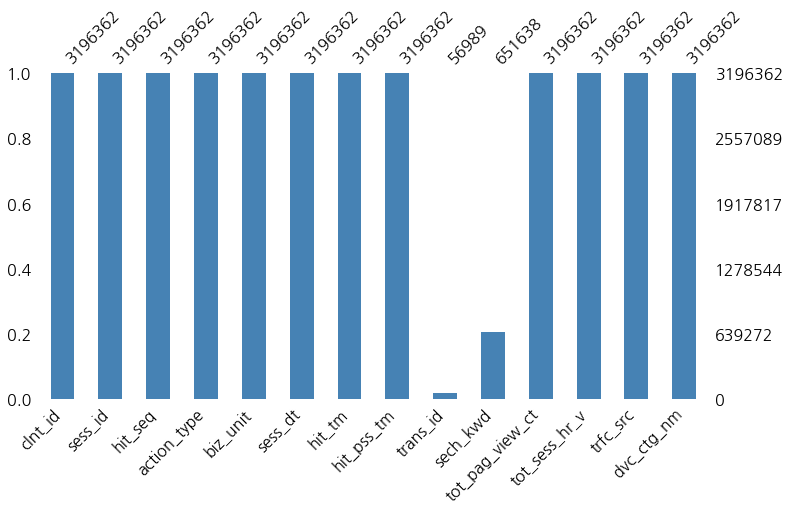

In [13]:
msno.bar(online, figsize=(12,6), color='steelblue')

## 데이터 합치기

간단한 분석을 위해서 필요한 칼럼만 추출하고 merge하겠습니다.  
이때 4개의 데이터를 합쳐서 한개의 데이터로 만들어줍니다. 

In [21]:
online_col = ['clnt_id', 'sess_id', 'hit_seq', 'action_type', 'hit_pss_tm', 'trans_id', 'sech_kwd', 'tot_pag_view_ct', 'tot_sess_hr_v', 'trfc_src', 'dvc_ctg_nm']
trade_col = ['trans_id', 'biz_unit', 'pd_c', 'de_dt','de_tm', 'buy_am', 'buy_ct']
customer_col = ['clnt_id', 'clnt_gender', 'clnt_age']
item_col = ['pd_c', 'clac_nm3']

In [22]:
temp = pd.merge(online[online_col], trade[trade_col], on='trans_id')
temp = pd.merge(temp, customer[customer_col], on='clnt_id')
df_data = pd.merge(temp, item[item_col], on='pd_c')

df_data= df_data.drop(['sess_id', 'trans_id', 'biz_unit', 'pd_c' , 'hit_seq', 'de_tm'], axis = 1)
df_data.head()

,clnt_id,action_type,hit_pss_tm,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,de_dt,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm3
0,2,6,791905,NaN,61.0,911.0,DIRECT,unknown,20190729,36000,20,F,30.0,커피 음료를
1,2,6,3251794,NaN,85.0,3256.0,DIRECT,unknown,20190731,1800,1,F,30.0,커피 음료를
2,2,6,306944,NaN,23.0,353.0,DIRECT,unknown,20190801,9000,5,F,30.0,커피 음료를
3,202,6,3133410,NaN,73.0,3174.0,DIRECT,unknown,20190818,1000,1,M,40.0,커피 음료를
4,202,6,1015069,NaN,37.0,1029.0,DIRECT,unknown,20190914,900,1,M,40.0,커피 음료를


In [23]:
df_data['clnt_id'] = df_data['clnt_id'].dropna()

## 데이터 저장

In [24]:
df_data = df_data.sort_values(['de_dt'])
df_data.to_csv('./new_data/all_data_nm3.csv',index=False)